In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
from sklearn.mixture import GaussianMixture

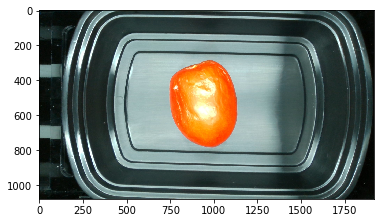

In [3]:
img = cv2.imread('jitomate.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

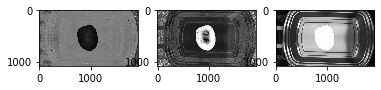

In [6]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(hsv[:,:,0],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(hsv[:,:,1],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(hsv[:,:,2],cmap='gray')
plt.show()

In [8]:
# Vectorizar la imagen
nrows,ncols,nch = hsv.shape
Xhsv = np.reshape(hsv,(ncols*nrows,nch))
print('Xhsv',Xhsv)

Xhsv [[103 160  51]
 [102 178  43]
 [102 174  44]
 ...
 [ 66  80  16]
 [ 66  85  15]
 [ 66  85  15]]


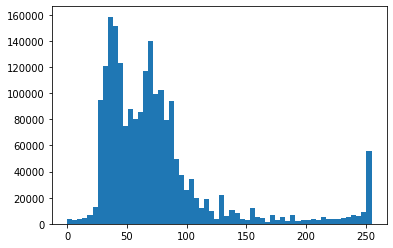

In [27]:
Xh = Xhsv[:,1] 
plt.figure()
plt.hist(Xh,bins=60)
plt.show()

In [28]:
XX = Xh
XX = np.reshape( XX, (len(Xh),1) )
model = GaussianMixture(n_components=2)
model.fit(XX)
print('means',model.means_)
print('variance',model.covariances_)
print('weights',model.weights_)

means [[ 60.39408077]
 [196.71879469]]
variance [[[ 577.86773695]]

 [[2664.23194742]]]
weights [0.89470496 0.10529504]


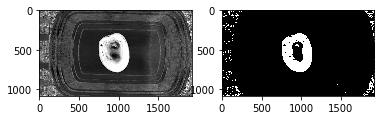

In [29]:
binarizada = np.zeros_like(hsv)
binarizada[ hsv[:,:,1]>150 ] = 255

plt.figure()
plt.subplot(1,2,1)
plt.imshow(hsv[:,:,1],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(binarizada,cmap='gray')
plt.show()